In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
from astropy.io import fits
import scipy.interpolate
from scipy.interpolate import splev, splrep
from scipy import interpolate
import scipy.interpolate as spi

In [10]:
# Load CSV File
df = pd.read_csv('/Users/bosse/Downloads/Spectral Fitting Parameter Values - Sheet1 (1).csv')
df

,name_be5hmark,Unnamed: 1,Companion?,Spectral Type,Effective Temperature,Surface Gravity,F_sed,Unnamed: 7,Good or Bad Fit?,Age,Age Flag
0,2MASS J05575096-1359503,NaN,NaN,7.0,1800,5.5,5,NaN,Bad,lowg;young,1
1,2MASS J23520507-1100435,NaN,NaN,7.0,1800,5.5,5,NaN,Bad,lowg,1
2,CC_CCv2.0_4795_107418,NaN,167.41,7.5,1500,5.5,5,Lots of Noise,Bad,COCONUTS_OLD,0
3,CC_CCv2.0_68871_71463,NaN,35.29,7.5,1700,5.5,5,NaN,Bad,COCONUTS_YOUNG,1
4,2MASSI J0335020+234235,NaN,NaN,8.5,1700,5.5,5,NaN,Bad,BPMG;Li;strongHa;accr;lowg;young,1
...,...,...,...,...,...,...,...,...,...,...,...
154,HD 3651B,NaN,42.90,27.5,800,5.0,5,NaN,NaN,ultracoolsheet_OLD,0
155,ULAS J141623.94+134836.3,NaN,9.80,27.5,800,5.5,5,NaN,NaN,ultracoolsheet_OLD,0
156,WISEPC J225540.74-311841.8,NaN,NaN,28.0,800,4.5,5,NaN,NaN,v-red;young?,1
157,BD +01 2920B,NaN,153.00,28.0,800,5.5,5,Lots of Noise,NaN,ultracoolsheet_OLD,0


In [17]:
spt = df['Spectral Type'].values
f_sed = np.array([float(element) for element in df['F_sed'].values])
age = df['Age Flag'].values
idyoung = np.where(age == 1)
idold = np.where(age == 0)
teff = df['Effective Temperature'].values
sg = df['Surface Gravity'].values
#idold_5 = np.where((age == 0) & (f_sed > 5))
#idyoung_5 = np.where((age == 0) & (f_sed > 5))
#f_sed[idold_5] += 0.5
#f_sed[idyoung_5] += 0.5

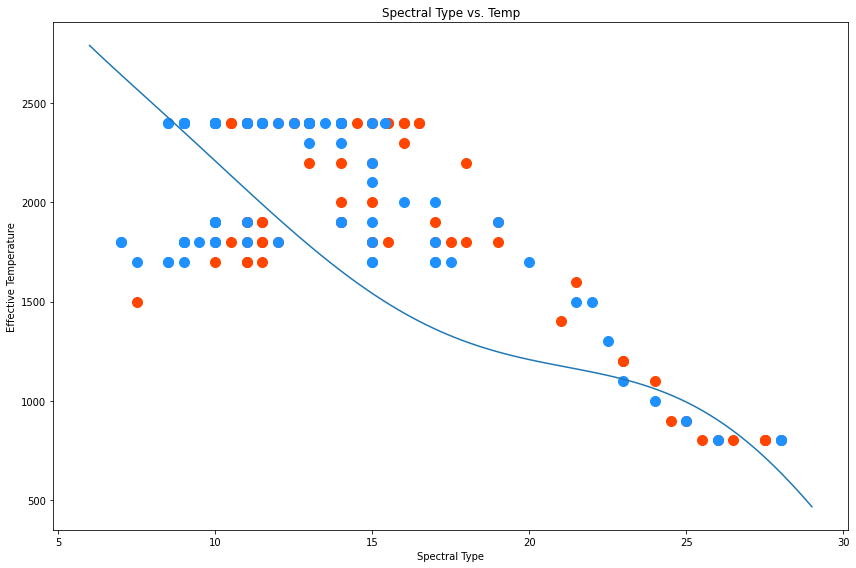

In [20]:
init_spt_array = np.linspace(6,29, 100)
c0 = 4.707e+03
c1 = -7.005e+02
c2 = 1.155e+02
c3 = -1.191e+01
c4 = 6.318e-01
c5 = -1.606e-02
c6 = 1.546e-04
coeff_array = np.array([c0, c1, c2, c3, c4, c5, c6])
init_teff_array = np.polyval(coeff_array[::-1], init_spt_array)
figure, axis = plt.subplots(1,1, figsize=(12,8))
axis.plot(spt[idold], teff[idold], marker='o', linestyle='none', markersize=10, color='orangered')
axis.plot(spt[idyoung], teff[idyoung], marker='o', linestyle='none', markersize=10, color='dodgerblue')
axis.plot(init_spt_array, init_teff_array)
axis.set_title("Spectral Type vs. Temp")
axis.set_xlabel("Spectral Type")
axis.set_ylabel("Effective Temperature")
figure.set_tight_layout(True)
figure.savefig('/Users/bosse/Pictures/Spectral Type vs. Temp.pdf', format='pdf', dpi=1000)

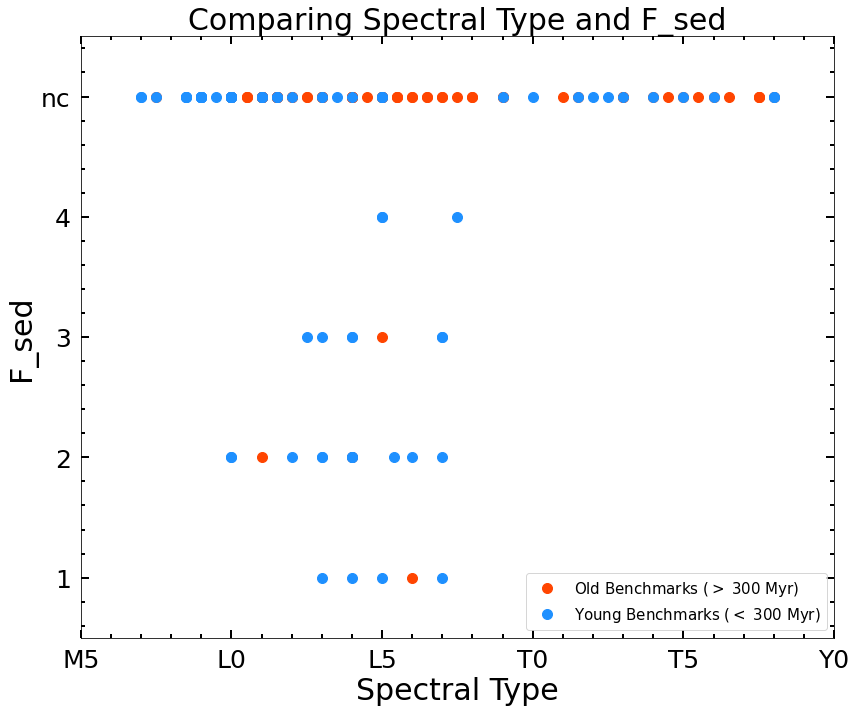

In [41]:
figure, axis = plt.subplots(1,1, figsize=(12,10))
axis.plot(spt[idold], f_sed[idold], marker='o', linestyle='none', markersize=10, color='orangered', label=r"Old Benchmarks ($>$ 300 Myr)")
axis.plot(spt[idyoung], f_sed[idyoung], marker='o', linestyle='none', markersize=10, color='dodgerblue', label=r"Young Benchmarks ($<$ 300 Myr)")
axis.set_title("Comparing Spectral Type and F_sed", fontsize="30" )
axis.set_xlabel("Spectral Type", fontsize="30")
axis.set_ylabel("F_sed", fontsize="30")
axis.set_xlim(5, 30)
axis.set_ylim([0.5,5.5])
axis.set_xticks([5, 10, 15, 20, 25, 30])
axis.set_xticklabels(["M5", "L0", "L5", "T0", "T5", "Y0"])
axis.set_yticks([1, 2, 3, 4, 5])
axis.set_yticklabels(["1", "2", "3", "4", "nc"])
axis.tick_params(which="both", direction="in", width=2, labelsize=25, pad=10)
axis.tick_params(which="major", bottom=True, left=True, top=True, right=True, length=8)
axis.tick_params(which="minor", bottom=True, left=True, top=True, right=True, length=4)
axis.minorticks_on()
axis.legend(fontsize=15, loc = "lower right")
figure.set_tight_layout(True)
figure.savefig('/Users/bosse/Downloads/Spectral Type vs. F_sed Figure.png', format = 'png', dpi = 1000, transparent=False)